## In this notebook, we implement a logistic regression model with a custom loss function. Our loss function is adopted from the traditional logarithmic loss. Its gradient is obtained via automatic differention using the [autograd](https://github.com/HIPS/autograd) package, which "efficiently computes derivatives of numpy code."

In [ ]:
%pylab inline

import pandas as pd

from autograd import grad
import autograd.numpy as np

## Define X, y, initial weights, and epsilon

In [2]:
X = np.array([
    [ 0.3213,  0.4856,  0.2995,  2.5044],
    [ 0.3005,  0.4757,  0.2974,  2.4691],
    [ 0.5638,  0.8005,  0.3381,  2.3102],
    [ 0.5281,  0.6542,  0.3129,  2.1298],
    [ 0.3221,  0.5126,  0.3085,  2.6147],
    [ 0.3055,  0.4885,  0.289 ,  2.4957],
    [ 0.3276,  0.5185,  0.3218,  2.6013],
    [ 0.5313,  0.7028,  0.3266,  2.1543],
    [ 0.4728,  0.6399,  0.3062,  2.0597],
    [ 0.3221,  0.5126,  0.3085,  2.6147]
])
y = np.array([1., 1., 0., 0., 1., 1., 1., 1., 0., 0.])

weights = np.zeros(X.shape[1])
eps = 1e-15

## Define our linear combinifier, bounded sigmoid, and custom loss function

In [3]:
def wTx(w, x):
    return np.dot(x, w)

def sigmoid(z):
    return 1./(1+np.exp(-z))

def logistic_predictions(w, x):
    predictions = sigmoid(wTx(w, x))
    return predictions.clip(eps, 1-eps)

def custom_loss(y, y_predicted):
    return -(y*np.log(y_predicted) - (1-y)*np.log(1-y_predicted)**2).mean()

def custom_loss_given_weights(w):
    y_predicted = logistic_predictions(w, X)
    return custom_loss(y, y_predicted)
    
gradient = grad(custom_loss_given_weights)

## Plot y_hat in [0, 1] vs. y=0 and y=1, given our custom loss function

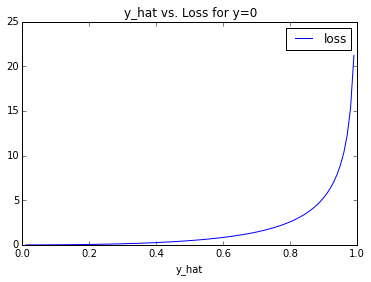

In [14]:
df = pd.DataFrame(
    [(y_hat, custom_loss(False, y_hat)) for y_hat in np.linspace(0, 1, 101)],
    columns=['y_hat', 'loss']
).plot(x='y_hat', title='y_hat vs. Loss for y=0')

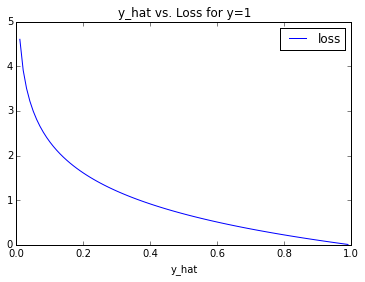

In [15]:
df = pd.DataFrame(
    [(y_hat, custom_loss(True, y_hat)) for y_hat in np.linspace(0, 1, 101)],
    columns=['y_hat', 'loss']
).plot(x='y_hat', title='y_hat vs. Loss for y=1')

## Gradient descent

In [85]:
for i in range(10000):
    if i % 1000 == 0:
        print('Iteration %-4d | Loss: %.4f' % (i, custom_loss_given_weights(weights)))
    weights -= gradient(weights) * .01

Iteration 0    | Loss: 0.6081
Iteration 1000 | Loss: 0.5716
Iteration 2000 | Loss: 0.5478
Iteration 3000 | Loss: 0.5315
Iteration 4000 | Loss: 0.5202
Iteration 5000 | Loss: 0.5122
Iteration 6000 | Loss: 0.5065
Iteration 7000 | Loss: 0.5024
Iteration 8000 | Loss: 0.4994
Iteration 9000 | Loss: 0.4972
